# MACHINE LEARNING - ANALISIS NO SUPERVISADO

Realizado por: Hugo Cordoba Leal

In [147]:
# Importamos las librerias necesarias para resolver el caso

import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import f_oneway


random_state = 42

**Caso 1. Clústeres de enfermedades cardiovasculares**

In [148]:
# Leemos el dataset de enfermedades cardiovasculares
df = pd.read_csv('./Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


**Procesamiento de datos**

In [149]:
from sklearn.preprocessing import LabelEncoder

# Eliminar columnas irrelevantes
data = df.drop(['Person ID'], axis=1)

# Convertir la columna 'Blood Pressure' en dos columnas numéricas separadas
data[['Systolic Pressure', 'Diastolic Pressure']] = data['Blood Pressure'].str.split('/', expand=True).astype(int)
data = data.drop(['Blood Pressure'], axis=1)

# Procesar columnas categóricas con LabelEncoder
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Occupation'] = label_encoder.fit_transform(data['Occupation'])
data['BMI Category'] = label_encoder.fit_transform(data['BMI Category'])
data['Sleep Disorder'] = label_encoder.fit_transform(data['Sleep Disorder'])

# Verificar la estructura actualizada de los datos
print("Estructura de los datos después del procesamiento:")
data.head(10)


Estructura de los datos después del procesamiento:


,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic Pressure,Diastolic Pressure
0,1,27,9,6.1,6,42,6,3,77,4200,2,126,83
1,1,28,1,6.2,6,60,8,0,75,10000,2,125,80
2,1,28,1,6.2,6,60,8,0,75,10000,2,125,80
3,1,28,6,5.9,4,30,8,2,85,3000,1,140,90
4,1,28,6,5.9,4,30,8,2,85,3000,1,140,90
5,1,28,9,5.9,4,30,8,2,85,3000,0,140,90
6,1,29,10,6.3,6,40,7,2,82,3500,0,140,90
7,1,29,1,7.8,7,75,6,0,70,8000,2,120,80
8,1,29,1,7.8,7,75,6,0,70,8000,2,120,80
9,1,29,1,7.8,7,75,6,0,70,8000,2,120,80


In [150]:
# Manejar los valores faltantes: imputar la media para las columnas numéricas
imputer_mean = SimpleImputer(strategy='mean')
data_imputed = imputer_mean.fit_transform(data)


**Estandarizacion de los datos**

In [151]:
# Estandarizar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

**Aplicacion del PCA**

In [152]:
# Aplicar PCA
pca = PCA(n_components=2)  # Reducir a 2 dimensiones para visualización
principal_components = pca.fit_transform(data_scaled)

print('number of components:', pca.n_components_)
print('explained variance ratio:', pca.explained_variance_ratio_)
print('sum of explained variance ratio:', sum(pca.explained_variance_ratio_))

number of components: 2
explained variance ratio: [0.34626206 0.27500466]
sum of explained variance ratio: 0.6212667160470312


In [153]:
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

In [154]:

# Verificar la estructura de los datos transformados
print("Estructura de los datos después de PCA:")
print(principal_df.head())

Estructura de los datos después de PCA:
        PC1       PC2
0  1.220609  2.670109
1 -0.463828  3.268847
2 -0.463828  3.268847
3  3.381588  4.065489
4  3.381588  4.065489


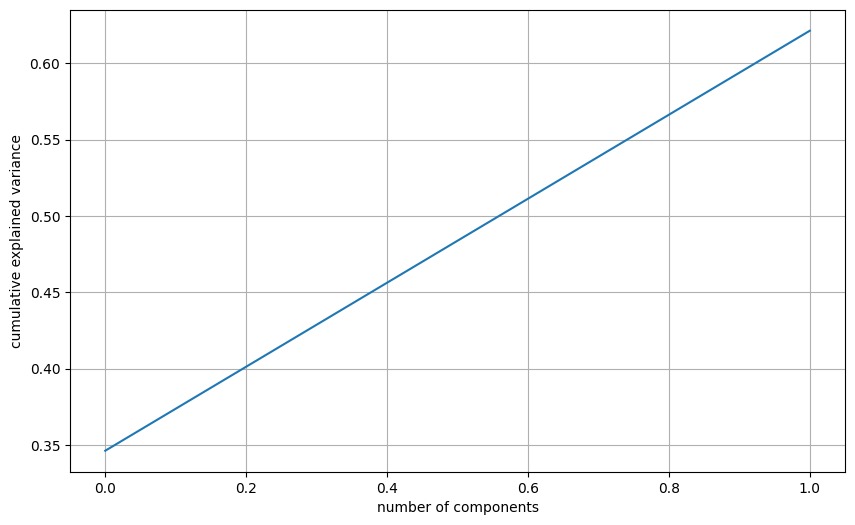

In [155]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.show()

In [156]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(data_scaled)

X_pca.shape

(374, 7)

**2. ¿Es este componente el mismo que determinaste al usar el modelo de regresión?**

No, el componente obtenido a través del análisis de Componentes Principales (PCA) no es el mismo que el determinado mediante un modelo de regresión. PCA busca encontrar las direcciones en las cuales los datos tienen la mayor variabilidad. Los componentes obtenidos a través de PCA se utilizan principalmente para reducir la dimensionalidad de los datos y explorar su estructura subyacente.

El PCA proporciona una representación compacta de la estructura de los datos en términos de su varianza, un modelo de regresión se enfoca en comprender y predecir relaciones específicas con una variable objetivo. 



**3. Analisis sobre que factores alteran mas al estres de los trabajadores**

In [157]:
# Realizar el análisis exploratorio de datos
for feature in data.columns:
    if feature != 'Stress Level':  # Excluir la columna de estrés
        # Calcular estadísticas descriptivas para cada grupo de estrés
        descriptive_stats = data.groupby('Stress Level')[feature].describe()
        print("Estadísticas descriptivas para", feature, ":")
        print(descriptive_stats)
        
        # Realizar prueba ANOVA para comparar distribuciones entre los grupos de estrés
        stress_groups = [group[1][feature] for group in data.groupby('Stress Level')]
        f_statistic, p_value = f_oneway(*stress_groups)
        print("Prueba ANOVA para", feature, ": F =", f_statistic, ", p =", p_value)
        if p_value < 0.05:
            print("Hay una diferencia significativa en", feature, "entre los grupos de estrés.\n")
        else:
            print("No hay una diferencia significativa en", feature, "entre los grupos de estrés.\n")

Estadísticas descriptivas para Gender :
              count      mean       std  min  25%  50%  75%  max
Stress Level                                                    
3              71.0  0.056338  0.232214  0.0  0.0  0.0  0.0  1.0
4              70.0  0.128571  0.337142  0.0  0.0  0.0  0.0  1.0
5              67.0  0.970149  0.171460  0.0  1.0  1.0  1.0  1.0
6              46.0  0.804348  0.401085  0.0  1.0  1.0  1.0  1.0
7              50.0  0.760000  0.431419  0.0  1.0  1.0  1.0  1.0
8              70.0  0.514286  0.503405  0.0  0.0  1.0  1.0  1.0
Prueba ANOVA para Gender : F = 71.55671775875781 , p = 3.534442791897566e-52
Hay una diferencia significativa en Gender entre los grupos de estrés.

Estadísticas descriptivas para Age :
              count       mean       std   min    25%   50%    75%   max
Stress Level                                                            
3              71.0  54.169014  5.518763  32.0  53.00  54.0  58.00  59.0
4              70.0  39.900000  4.7